In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

## Данные

**Загружаем данные**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
               "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
               "Ботинок"]

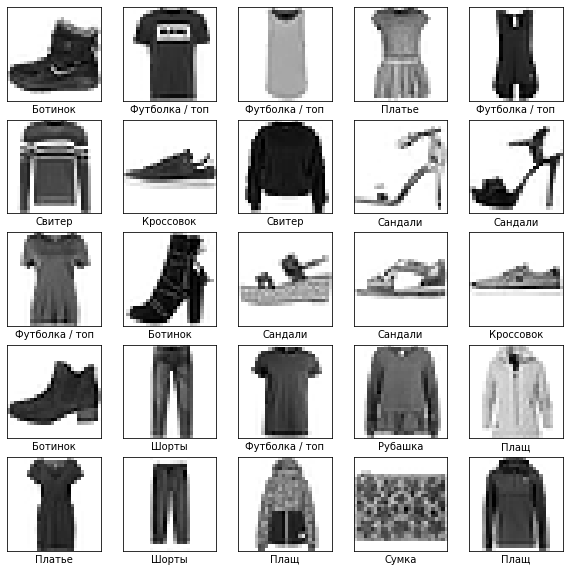

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Предобработка

**Нормализуем данные X_train и X_test**

Поскольку они имеют значения от 0 до 255, поделим их на 255.0

In [4]:
x_train = (np.expand_dims(x_train, axis=-1)/255.).astype(np.float32)
x_test = (np.expand_dims(x_test, axis=-1)/255.).astype(np.float32)

## Создайём модель

In [5]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return fc_model

model = build_fc_model()

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Тренировка модели

In [6]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.4394 - accuracy: 0.8437
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2945 - accuracy: 0.8939
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2489 - accuracy: 0.9089
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2185 - accuracy: 0.9191
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1948 - accuracy: 0.9279


### Оценка модели

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9090
Test accuracy:  0.9089999794960022


In [8]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [9]:
prediction = []
for i in range(10000):
    prediction.append(np.argmax(predictions[i]))
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.89      0.85      1000
           3       0.88      0.96      0.92      1000
           4       0.88      0.83      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.64      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000
